#**M7 New Taipei City Real Estate Valuation Dataset**




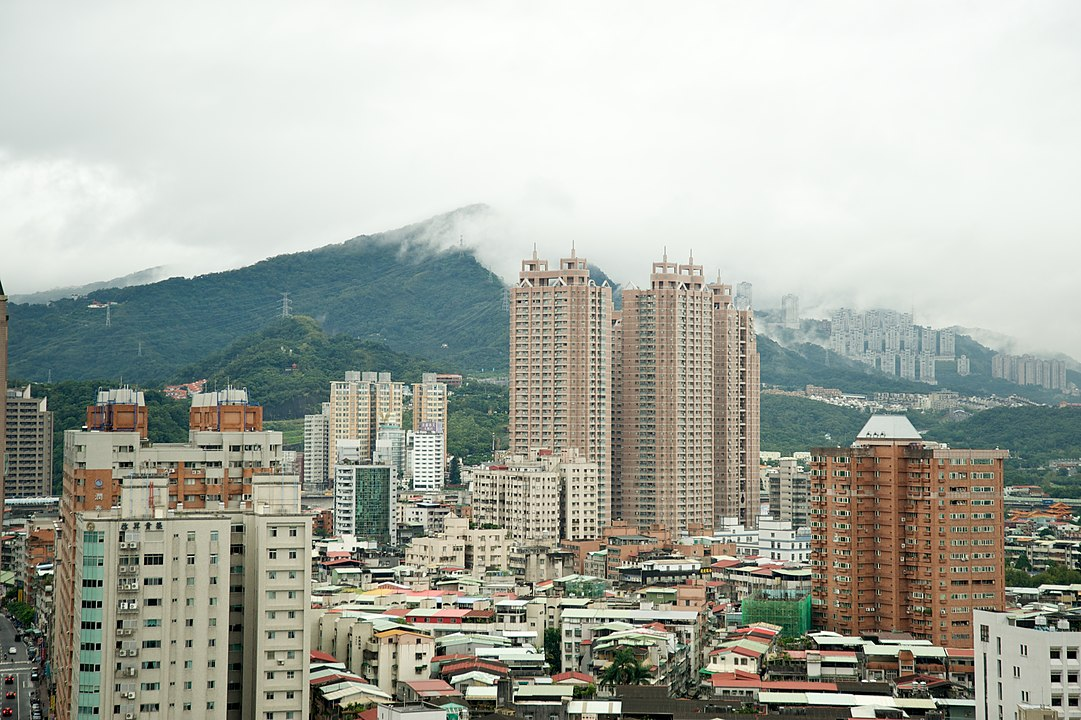

By Fred Hsu on en.wikipedia - Photo taken and uploaded by user, CC BY-SA 3.0, https://commons.wikimedia.org/w/index.php?curid=9600721

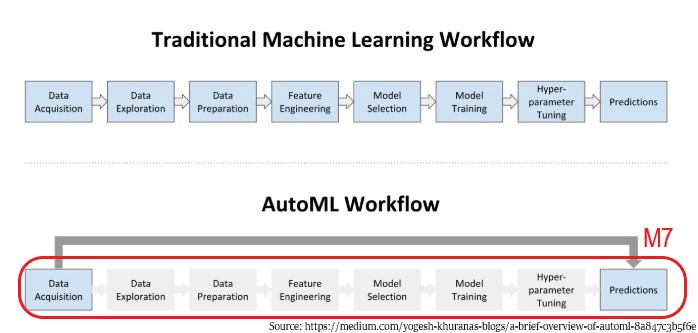

#**Table of Contents**
* Business Problem
* Executive SUmmary (BLUF)
* READ FIRST!!
* Libraries
* Data
* Preprocessing
* Scaling & Holdout Sample
* Auto-Sklearmn
* TPOT
* Conclusion

#**Business Problem**
Explore the performance of AutoML packages (available in python) on the New Tipei City real estate valuation dataset to make a recommendation to Sinyi Realty




#**Executive Summary (BLUF)** 
We built Auto-Sklearn and TPOT AutoML models. These models are competitive, but probably no better than the stacked ensemble we developed in M5. Of the AutoML models, Auto-Sklearn is the best, with an MSE of 37.52.

#**READ FIRST!!**
Run the following code block. It may fail!
Then RESTART the runtime and run all again!!!

In [ ]:
!sudo apt-get update
!sudo apt-get install build-essential swig
!sudo apt-get upgrade
!curl https://raw.githubusercontent.com/automl/auto-sklearn/master/requirements.txt | xargs -n 1 -L 1 pip install
!pip install auto-sklearn

import autosklearn.regression

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Fetched 252 kB in 2s (104 kB/s)
Reading package li

#**Libraries**


In [ ]:
# Basic libraries
import pandas as pd
import seaborn as sns
import numpy as np
from numpy import unique
from numpy import where
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib import pyplot
import scipy.stats as ss
import math

In [ ]:
!pip install tpot

     |████████████████████████████████| 87 kB 2.5 MB/s eta 0:00:011
     |████████████████████████████████| 160 kB 13.7 MB/s 
     |████████████████████████████████| 193.7 MB 20 kB/s 
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11956 sha256=2dbd434aa3dbe8af5ef97485bdb2cf7bf8f6aeae9b0860f3a2a80c2f85976b5b
  Stored in directory: /root/.cache/pip/wheels/e2/d2/79/eaf81edb391e27c87f51b8ef901ecc85a5363dc96b8b8d71e3
Successfully built stopit
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [ ]:
# Tree-based pipeline from TPOT: credits: http://automl.info/tpot/
# import the AutoMLpackage after installing tpot.
import tpot
# import other necessary packages.
from tpot import TPOTRegressor


In [ ]:
# sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn import metrics
from sklearn import linear_model
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, StackingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import partial_dependence
from sklearn.inspection import PartialDependenceDisplay

In [ ]:
# Update openpyxl
!pip install openpyxl==3.0.5


     |████████████████████████████████| 242 kB 4.2 MB/s 
  Attempting uninstall: openpyxl
    Found existing installation: openpyxl 3.0.9
    Uninstalling openpyxl-3.0.9:
      Successfully uninstalled openpyxl-3.0.9


#**Data**
The following is adaptedfrom https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set

The market historical data set of real estate valuation were collected from Sindian Dist., New Taipei City, Taiwan. 

Attribute Information:

The predictors/deatires are as follows:
- X1=the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
- X2=the house age (unit: year)
- X3=the distance to the nearest MRT station (unit: meter)
- X4=the number of convenience stores in the living circle on foot (integer)
- X5=the geographic coordinate, latitude. (unit: degree)
- X6=the geographic coordinate, longitude. (unit: degree)

The target is as follows:
Y= house price of unit area (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared)

Note: X7_Cluster, a geographical cluster feature, based upon kMeans clustering of latitide and longitude, will be added during preprocessing.


In [ ]:
# Read data from UCI Machine Learning Repo
file_ = "https://archive.ics.uci.edu/ml/machine-learning-databases/00477/Real%20estate%20valuation%20data%20set.xlsx"   
df = pd.DataFrame(pd.read_excel(file_)) # read in csv file

In [ ]:
# Head of df
df.head(10)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
5,6,2012.666667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,7,2012.666667,34.5,623.47310,7,24.97933,121.53642,40.3
7,8,2013.416667,20.3,287.60250,6,24.98042,121.54228,46.7
8,9,2013.500000,31.7,5512.03800,1,24.95095,121.48458,18.8
9,10,2013.416667,17.9,1783.18000,3,24.96731,121.51486,22.1


#**Preprocessing**

In [ ]:
# Drop the index column (Column 0, "No")
if 'No' in df.columns:
  df = df.drop(["No"], axis = 1)

# The column names are verbose, so rename them (optional)
df.rename(columns = {"X1 transaction date": "X1_Date", "X2 house age": "X2_Age", "X3 distance to the nearest MRT station": "X3_MRT", "X4 number of convenience stores": "X4_Stores", "X5 latitude": "X5_Lat", "X6 longitude": "X6_Long", "Y house price of unit area": "Y_Price"},inplace = True)

# Examine the data using df.head() or df.tail()
print("HEAD of df\n", df.head()) 

HEAD of df
        X1_Date  X2_Age     X3_MRT  X4_Stores    X5_Lat    X6_Long  Y_Price
0  2012.916667    32.0   84.87882         10  24.98298  121.54024     37.9
1  2012.916667    19.5  306.59470          9  24.98034  121.53951     42.2
2  2013.583333    13.3  561.98450          5  24.98746  121.54391     47.3
3  2013.500000    13.3  561.98450          5  24.98746  121.54391     54.8
4  2012.833333     5.0  390.56840          5  24.97937  121.54245     43.1


In [ ]:
# Split Predictors & Target
X = pd.DataFrame(df.drop(['Y_Price'],axis=1))
y = pd.DataFrame(df['Y_Price']) 
y.columns = ['Y_Price']
print('X:\n',X.head())
print('\ny\n',y.head())

X:
        X1_Date  X2_Age     X3_MRT  X4_Stores    X5_Lat    X6_Long
0  2012.916667    32.0   84.87882         10  24.98298  121.54024
1  2012.916667    19.5  306.59470          9  24.98034  121.53951
2  2013.583333    13.3  561.98450          5  24.98746  121.54391
3  2013.500000    13.3  561.98450          5  24.98746  121.54391
4  2012.833333     5.0  390.56840          5  24.97937  121.54245

y
    Y_Price
0     37.9
1     42.2
2     47.3
3     54.8
4     43.1


In [ ]:
# Check skewness of target
y.skew(axis = 0, skipna = True)

Y_Price    0.599853
dtype: float64

In [ ]:
# Code for skewness correction (see source below)
# Depending upon the characteritics of a feature (column), a log, Box-Cox or power transform is applied to normalize the distribution 

# -*- coding: utf-8 -*-
"""

"""

##################################################
# A function that will accept a pandas dataframe
# and auto-transforms columns that exceeds threshold value
#  -  Offers choice between boxcox or log / exponential transformation
#  -  Automatically handles negative values
#  -  Auto recognizes positive /negative skewness



def skew_autotransform(DF, include = None, exclude = None, plot = False, threshold = 1, exp = False):
    
    #Get list of column names that should be processed based on input parameters
    if include is None and exclude is None:
        colnames = DF.columns.values
    elif include is not None:
        colnames = include
    elif exclude is not None:
        colnames = [item for item in list(DF.columns.values) if item not in exclude]
    else:
        print('No columns to process!')
    
    #Helper function that checks if all values are positive
    def make_positive(series):
        minimum = np.amin(series)
        #If minimum is negative, offset all values by a constant to move all values to positive teritory
        if minimum <= 0:
            series = series + abs(minimum) + 0.01
        return series
    
    
    #Go through desired columns in DataFrame
    for col in colnames:
        #Get column skewness
        skew = DF[col].skew()
        transformed = True
        
        if plot:
            #Prep the plot of original data
            sns.set_style("darkgrid")
            sns.set_palette("Blues_r")
            fig, axes = plt.subplots(1, 2, figsize=(10, 5))
            #ax1 = sns.distplot(DF[col], ax=axes[0])
            ax1 = sns.histplot(DF[col], ax=axes[0], color="blue", label="100% Equities", kde=True, stat="density", linewidth=0)
            ax1.set(xlabel='Original ' + str(col))
        
        #If skewness is larger than threshold and positively skewed; If yes, apply appropriate transformation
        if abs(skew) > threshold and skew > 0:
            skewType = 'positive'
            #Make sure all values are positive
            DF[col] = make_positive(DF[col])
            
            if exp:
               #Apply log transformation 
               DF[col] = DF[col].apply(math.log)
            else:
                #Apply boxcox transformation
                DF[col] = ss.boxcox(DF[col])[0]
            skew_new = DF[col].skew()
         
        elif abs(skew) > threshold and skew < 0:
            skewType = 'negative'
            #Make sure all values are positive
            DF[col] = make_positive(DF[col])
            
            if exp:
               #Apply exp transformation 
               DF[col] = DF[col].pow(10)
            else:
                #Apply boxcox transformation
                DF[col] = ss.boxcox(DF[col])[0]
            skew_new = DF[col].skew()
        
        else:
            #Flag if no transformation was performed
            transformed = False
            skew_new = skew
        
        #Compare before and after if plot is True
        if plot:
            print('\n ------------------------------------------------------')     
            if transformed:
                print('\n %r had %r skewness of %2.2f' %(col, skewType, skew))
                print('\n Transformation yielded skewness of %2.2f' %(skew_new))
                sns.set_palette("Paired")
                #ax2 = sns.distplot(DF[col], ax=axes[1], color = 'r')
                ax2 = sns.histplot(DF[col], ax=axes[1], color="red", label="100% Equities", kde=True, stat="density", linewidth=0)
                ax2.set(xlabel='Transformed ' + str(col))
                plt.show()
            else:
                print('\n NO TRANSFORMATION APPLIED FOR %r . Skewness = %2.2f' %(col, skew))
                #ax2 = sns.distplot(DF[col], ax=axes[1])
                ax2 = sns.histplot(DF[col], ax=axes[1], color="blue", label="100% Equities", kde=True, stat="density", linewidth=0)
                ax2.set(xlabel='NO TRANSFORM ' + str(col))
                plt.show()
    return DF

In [ ]:
# Use code above (adapted from https://github.com/datamadness/Automatic-skewness-transformation-for-Pandas-DataFrame) to correct skewness
X = skew_autotransform(X.copy(deep=True), include=['X3_MRT'],plot = False, exp = False, threshold = 1)

# Unfortunately there is a defect in the boxcox method and X6_Long cannot be transformed

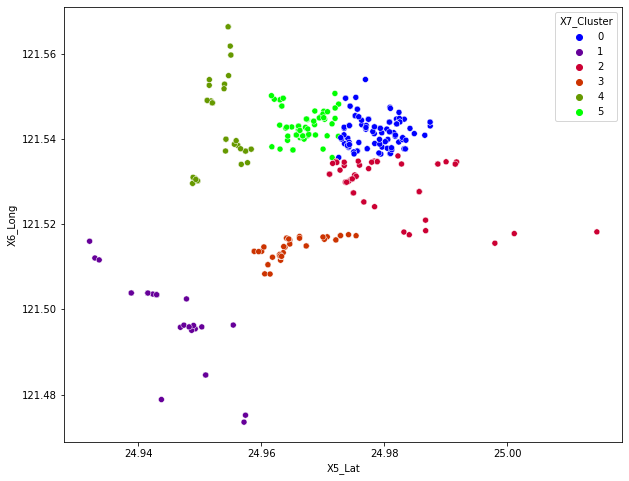

In [ ]:
# k-means clustering of latitudes & longitudes
# define the model
model = KMeans(n_clusters=6)
# fit the model
model.fit(X[['X5_Lat','X6_Long']])
# assign a cluster to each example
yhat = pd.DataFrame(model.predict(X[['X5_Lat','X6_Long']]),columns=['X7_Cluster'])
if 'X7_Cluster' not in X:
  X = pd.concat([X,yhat],axis=1)
else:
  X['X7_Cluster'] = yhat
colors = ['#747FE3', '#8EE35D', '#E37346']
sns.set_palette(sns.color_palette(colors))
plt.figure(figsize=(10,8))
sns.scatterplot(x='X5_Lat', y='X6_Long', data=X, hue='X7_Cluster', palette = "brg")


In [ ]:
# record feature labels
Xcols = X.columns

In [ ]:
# Tukey Rule outliers for target (price/ping)
def tukey_rule(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_lim = data[col].quantile(0.5) + 2 * IQR
    lower_lim = data[col].quantile(0.5) - 2 * IQR
    outliers = []
    for index, x in enumerate(data[col]):
        if x < lower_lim or x >= upper_lim:
            outliers.append(index)
    return outliers

# # Identify outliers
# print('OUTLIERS:\n)')
col = 'Y_Price'
outliers_Tukey = tukey_rule(y,col)
# print("Column ",col,": ",outliers_Tukey)
X = X.drop(labels=outliers_Tukey, axis=0)
y = y.drop(labels=outliers_Tukey, axis=0)


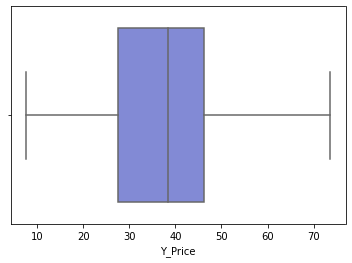

In [ ]:
# Boxplot y to check outliers
sns.boxplot(x=y['Y_Price'])

#**Scaling & Holdout Sample**

In [ ]:
# Create holdout sample
# Note: split before doing any trasformations on the data!!!

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.2,    # 80-20 training vs test set split
                     random_state=0)
# print('Shape of X and y',X.shape, y.shape, '\nShape of training set X and y',X_train.shape, y_train.shape, '\nShape of test set X and y',X_test.shape, y_test.shape) 


In [ ]:
# Bringing features onto the same scale：normalization and standardization:

# Min-max scaling(Normalization) (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

# mms = MinMaxScaler()
# X_norm = mms.fit_transform(X)

# Standardization z-score  (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)
# from sklearn.preprocessing import StandardScaler
stdsc1 = StandardScaler()  
X_train_std = stdsc1.fit_transform(X_train)
X_test_std = stdsc1.transform(X_test)
stdsc2 = StandardScaler()  
y_train_std = stdsc2.fit_transform(y_train)
y_test_std = stdsc2.transform(y_test)

In [ ]:
# Ensdure training and test data are in pandas dataframes
X_train_std =  pd.DataFrame(X_train_std,columns = X.columns)
X_test_std = pd.DataFrame(X_test_std,columns = X.columns)
y_train_std = pd.DataFrame(y_train_std)
y_test_std = pd.DataFrame(y_test_std)

In [ ]:
# Report performance
def Performance(actuals,predictions):
  print('MSE: %.2f ' % mean_squared_error(actuals, predictions))
  print('MAE: %.2f ' % mean_absolute_error(actuals,predictions)) 
  print('R^2: %.2f' % r2_score(actuals, predictions))

# Plotting the actuals vs predictions 
def PredsVsActuals(actuals,predictions):
  plt.plot(actuals, predictions, '.', color='blue')
  plt.xlabel('Actuals')
  plt.ylabel('Predictions')
  plt.show()

#**Auto-Sklearn**

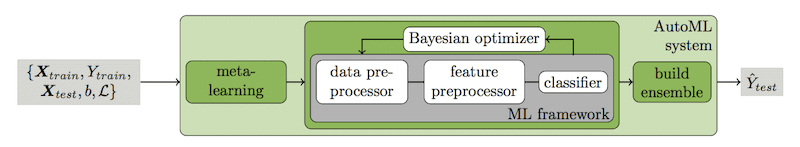

auto-sklearn results:
  Dataset name: 136c33b8-ce7e-11ec-9179-0242ac1c0002
  Metric: mean_squared_error
  Best validation score: 0.213653
  Number of target algorithm runs: 49
  Number of successful target algorithm runs: 49
  Number of crashed target algorithm runs: 0
  Number of target algorithms that exceeded the time limit: 0
  Number of target algorithms that exceeded the memory limit: 0

MSE: 34.54 
MAE: 4.08 
R^2: 0.74


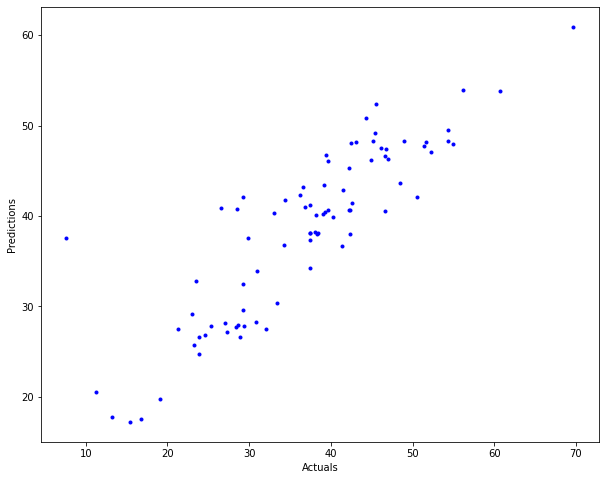

In [ ]:
# Create Auto-Sklearn model and report performance
# regr = AutoSklearnRegressor(time_left_for_this_task=5*60, per_run_time_limit=30, n_jobs=-1,ensemble_size=1, initial_configurations_via_metalearning=0)  #Use this instance if you want to suppress the ensemble 
regr = autosklearn.regression.AutoSklearnRegressor(time_left_for_this_task=5*60, per_run_time_limit=30, n_jobs=-1,metric = autosklearn.metrics.mean_squared_error)
regr.fit(X_train_std, y_train_std)
# summarize
print(regr.sprint_statistics())
# evaluate best model
y_pred_std = regr.predict(X_test_std)
y_pred_std = pd.DataFrame(y_pred_std)
y_pred = stdsc2.inverse_transform(y_pred_std)
# Performance
plt.figure(figsize=(10,8))
Performance(y_test,y_pred)
PredsVsActuals(y_test,y_pred)

In [ ]:
# Show the Auto-Sklearn leaderboard and final model
print(regr.leaderboard()) # Leaderboard
print(regr.show_models())  # Final model

          rank  ensemble_weight               type      cost  duration
model_id                                                              
26           1             0.02        extra_trees  0.213653  3.224019
43           2             0.36      random_forest  0.215297  4.448437
10           3             0.20        extra_trees  0.230511  4.818173
4            4             0.08  gradient_boosting  0.236180  4.623256
23           5             0.10                sgd  0.238661  1.366308
22           6             0.20         libsvm_svr  0.252835  1.612552
27           7             0.04   gaussian_process  0.418403  2.341231
{26: {'model_id': 26, 'rank': 1, 'cost': 0.2136525912157387, 'ensemble_weight': 0.02, 'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x7fa6f6d31710>, 'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice object at 0x7fa6f5d7c590>, 'regressor': <autosk

#**TPOT**
Tree-based pipeline from TPOT: credits: http://automl.info/tpot/

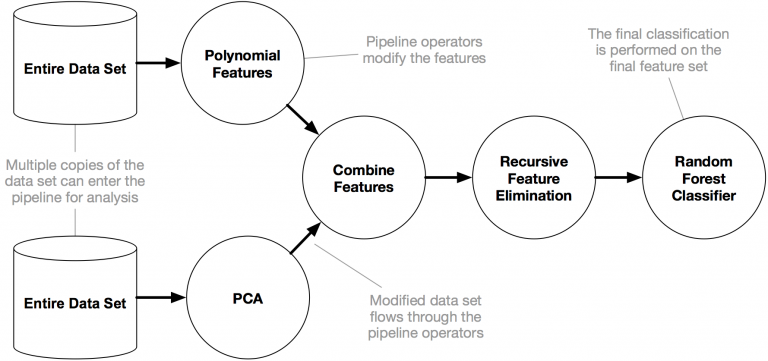

30 operators have been imported by TPOT.


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 X contains negative values..
_pre_test decorator: _random_mutation_operator: num_test=0 X contains negative values..
_pre_test decorator: _random_mutation_operator: num_test=0 l1 was provided as affinity. Ward can only work with euclidean distances..

Generation 1 - Current Pareto front scores:

-1	-0.20243718190250914	RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.4, RandomForestRegressor__min_samples_leaf=3, RandomForestRegressor__min_samples_split=3, RandomForestRegressor__n_estimators=100)
_pre_test decorator: _random_mutation_operator: num_test=0 '(slice(None, None, None), 0)' is an invalid key.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluatio

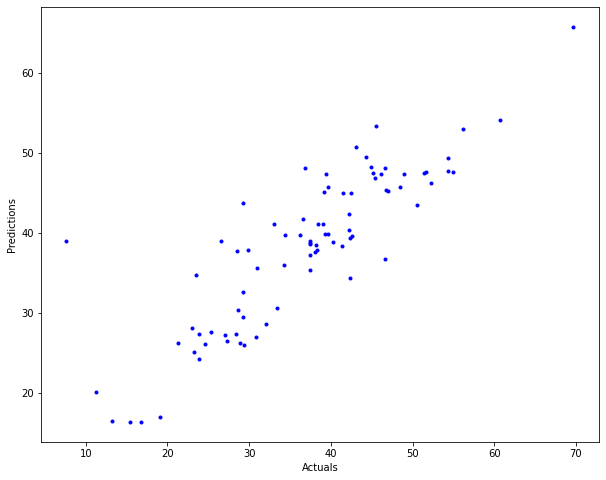

In [ ]:
# Let TPOT build a model!
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
regr = TPOTRegressor(generations=5, population_size=50, cv=cv, scoring='neg_mean_squared_error', verbosity=3, random_state=1, n_jobs=-1)
regr.fit(X_train_std, y_train_std)
# evaluate best model
y_pred_std = regr.predict(X_test_std)
y_pred_std = pd.DataFrame(y_pred_std)
y_pred = stdsc2.inverse_transform(y_pred_std)
# Performance
plt.figure(figsize=(10,8))
Performance(y_test,y_pred)
PredsVsActuals(y_test,y_pred)

In [ ]:
# Show the final model
regr.fitted_pipeline_

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                ('robustscaler', RobustScaler()),
                ('extratreesregressor',
                 ExtraTreesRegressor(bootstrap=True,
                                     max_features=0.6000000000000001,
                                     min_samples_split=6, random_state=1))])

The top of the combined M5 and M7 leaderboard is as follows:

|**Regressor** |    MSE    |       MAE      |    $R^2$    | 
|:----------------------|:------------:|:--------------:|:-------------:|
|Stacked ensemble (M5) | 34.83 | 4.27 | 0.73 | 
|XGBoost (M5) | 36.16 | 4.33 | 0.72 | 
|Random Forest (M5) | 37.28| 4.50 | 0.72 | 
|Auto-Sklearn | 37.52 | 4.25 | 0.71| 
|TPOT | 39.39 | 4.38 | 0.70 |
|Adaboost (M5) | 44.63 | 5.02 | 0.66 | 

Well crafted stacked ensembles are always likely to win. 


#**Conclusion**
We built Auto-Sklearn and TPOT models. These models are competitive, but probably no better than the stacked ensemble we developed in M5. Of the AutoML models, Auto-Sklearn is the best, with an MSE of 37.52.

